In [158]:
import pandas as pd
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import sympy as sym
import sympy.vector as vec


In [159]:
def sym_Amplitud_Voltaje(omega,omega0,gamma):
    V0 = 4.24 # volts
    numerator = V0*gamma*omega
    denominator = sym.sqrt(omega**2 * gamma**2 + (omega0**2 - omega**2)**2)
    return numerator/denominator

def fixed_Amplitud_Voltaje(omega,gamma):
    omega0=47305.23182233
    V0 = 4.24
    numerator = V0*gamma*omega
    denominator = np.sqrt(omega**2 * gamma**2 + (omega0**2-omega**2)**2)
    return numerator/denominator
    


def Amplitud_Voltaje(omega,omega0,gamma):
    V0 = 4.24 # volts
    numerator = V0*gamma*omega
    denominator = np.sqrt(omega**2 * gamma**2 + (omega0**2 - omega**2)**2)
    return numerator/denominator

def Desfase(omega, omega0, gamma):
    return np.arctan((omega0**2 - omega**2)/(omega*gamma))

def sym_Desfase(omega, omega0, gamma):
    return sym.atan((omega0**2 - omega**2)/(omega*gamma))
    

In [160]:
DataFrame = pd.read_csv("Rabbadon's Hat.csv",sep="\t")
freq = DataFrame["Frecuencia (kHz)"].to_numpy()
phase = -DataFrame["Fase (°)"].to_numpy()
phase1 = phase[:20]
phase2 = -phase[20:]
phase = np.append(phase1,phase2)*(np.pi/180)

omega = freq*2*np.pi*1e3

vpp1 = DataFrame["Voltaje pico-pico 1 (V)"].to_numpy()
vpp2 = DataFrame["Voltaje pico-pico 2 (V)"].to_numpy()

# Cálculos

In [176]:
guess = [47305.23182233,-2331220.46271024]

param,cov = sci.optimize.curve_fit(fixed_Amplitud_Voltaje,omega,vpp2)
param,np.sqrt(cov)

(array([40808.61993852]), array([[553.90159137]]))

In [162]:
x = np.linspace(omega[0],omega[-1])
y = Amplitud_Voltaje(x,47305.23182233,param[0])

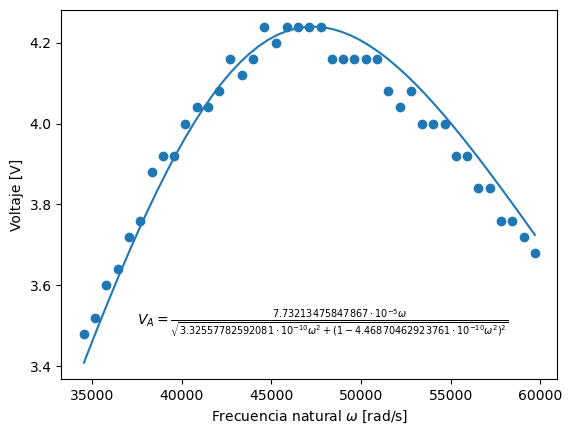

In [163]:
plt.scatter(omega,vpp2)
plt.plot(x,y)
plt.xlabel(r"Frecuencia natural $\omega$ [rad/s]")
plt.ylabel(r"Voltaje [V]")
plt.text(37500,3.5,r"$V_A = \frac{7.73213475847867 \cdot 10^{-5} \omega}{\sqrt{3.32557782592081 \cdot 10^{-10} \omega^{2} + \left(1 - 4.46870462923761 \cdot 10^{-10} \omega^{2}\right)^{2}}}$")
plt.savefig("Vpp2freq.pdf")

In [164]:
print(sym.latex(sym_Amplitud_Voltaje(om,47305.23182233,param[0])))

\frac{7.73213475847867 \cdot 10^{-5} \omega}{\sqrt{3.32557782592081 \cdot 10^{-10} \omega^{2} + \left(1 - 4.46870462923761 \cdot 10^{-10} \omega^{2}\right)^{2}}}


(array([   47305.23182233, -2331220.46271024]),
 array([   88.06544626, 27813.46715252]))

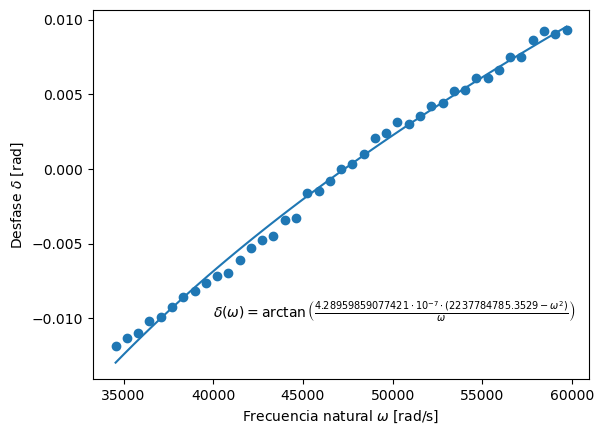

In [187]:
param2,cov2 = sci.optimize.curve_fit(Desfase,omega,phase*(np.pi/180),p0 = [47500,-1.4],maxfev=100000)
plt.scatter(omega,phase*(np.pi/180))
x = np.linspace(omega[0],omega[-1])
y = Desfase(x,param2[0],param2[1])
plt.plot(x,y)
plt.ylabel(r"Desfase $\delta$ [rad]")
plt.xlabel(r"Frecuencia natural $\omega$ [rad/s]")
plt.text(40000,-0.01,r"$\delta(\omega) = \operatorname{arctan}{\left(\frac{4.28959859077421 \cdot 10^{-7} \cdot \left(2237784785.3529 - \omega^{2}\right)}{\omega} \right)}$")
plt.savefig("desfase.pdf")
param2,cov2
param2,np.sqrt(np.diag(cov2))

In [181]:
print(sym.latex(sym_Desfase(om,47305.23,2331220.46)))

\operatorname{atan}{\left(\frac{4.28959859077421 \cdot 10^{-7} \cdot \left(2237784785.3529 - \omega^{2}\right)}{\omega} \right)}


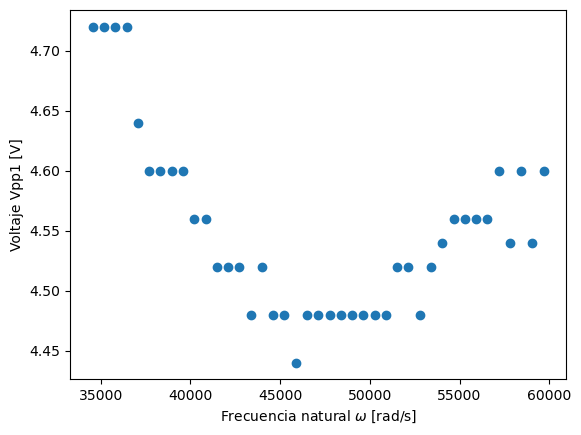

In [182]:
plt.scatter(omega,vpp1)
plt.ylabel("Voltaje Vpp1 [V]")
plt.xlabel(r"Frecuencia natural $\omega$ [rad/s]")
plt.savefig("Vpp1.pdf")

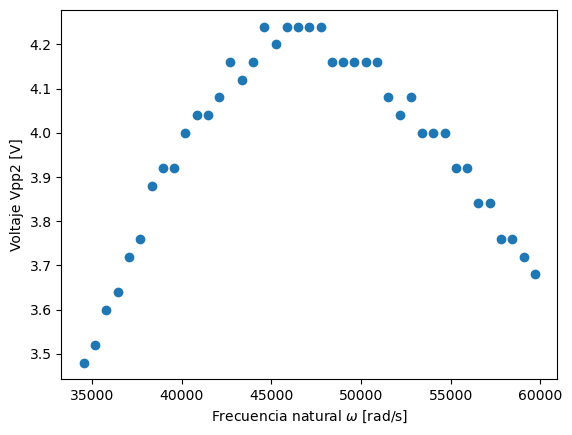

In [183]:
plt.scatter(omega,vpp2)
plt.ylabel("Voltaje Vpp2 [V]")
plt.xlabel(r"Frecuencia natural $\omega$ [rad/s]")
plt.savefig("Vpp2.pdf")

(array([   47305.23182233, -2331220.46271024]),
 array([[ 7.75552282e+03, -6.41477837e+05],
        [-6.41477837e+05,  7.73588955e+08]]))

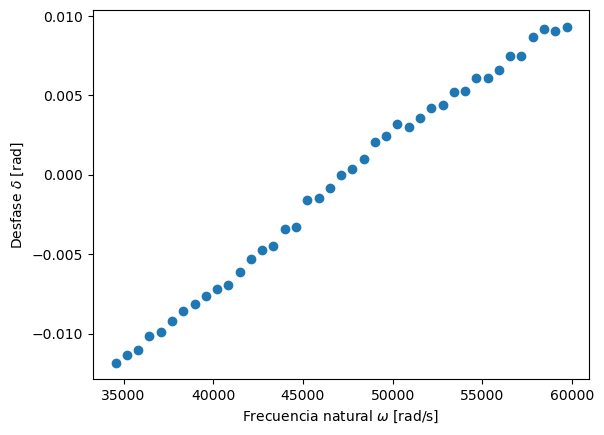

In [185]:
param2,cov2 = sci.optimize.curve_fit(Desfase,omega,phase*(np.pi/180),p0 = [47500,-1.4],maxfev=100000)
plt.scatter(omega,phase*(np.pi/180))
x = np.linspace(omega[0],omega[-1])
y = Desfase(x,param2[0],param2[1])
plt.ylabel(r"Desfase $\delta$ [rad]")
plt.xlabel(r"Frecuencia natural $\omega$ [rad/s]")
plt.savefig("desfase_no.pdf")
param2,cov2